# Task C

## Goal

1. iterative Method
    1. Calc smallest and biggest eigenvalue 
    2. Calc (all?) eigenvectors?
2. verfiy using some linalg libaray

## sonstiges Wissen

[doppelt stoachastisch](https://de.wikipedia.org/wiki/Doppelt-stochastische_Matrix), daraus folgt:
+ betragsgrößter eigenwert = 1

I use power iteration as described in the lecture of 15.03.2024 and in the code on the [github](https://github.com/nordam/ComputationalPhysics/blob/master/Notebooks/11%20-%20Eigenvalues%2C%20eigenvectors%20and%20SVD.ipynb). I used the code example provided there.


In [1]:
from tools import power_iteration, generate_matrix_simple
import numpy as np
import matplotlib.pyplot as plt

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [2]:
# Parameter
nodes = 21
starting_x = 10
connections = [-2,-1,1,2]
maxiter = 1000
tol = 1e-6

In [3]:
# generate inital_state and matrix
t_matrix = generate_matrix_simple(nodes,connections)

In [4]:
# find biggest eigenvalue
eig_val_big, eig_vec_big, conv_status = power_iteration(t_matrix, maxiter, tol)
print(f"eigenvalue: {eig_val_big}")
print(f"eigenvector: {eig_vec_big}")
print(f"converged: {conv_status}")

eigenvalue: 0.9999999999924386
eigenvector: [0.21821726 0.21821662 0.21821609 0.21821572 0.21821555 0.21821558
 0.21821582 0.21821624 0.21821681 0.21821748 0.21821818 0.21821885
 0.21821944 0.2182199  0.21822017 0.21822024 0.2182201  0.21821977
 0.21821927 0.21821865 0.21821795]
converged: False


In [5]:
# Now we find the (absolute) smallest eigenvalue
# First step inverting the Matrix 
inv_t_matrix = np.linalg.inv(t_matrix)
inv_eig_val, inv_eig_vec, conv_status = power_iteration(inv_t_matrix, maxiter, tol)
# calculate the smalles eig_value
eig_val_small = 1/inv_eig_val
eig_vec_small = inv_eig_vec
print(f"eigenvalue: {eig_val_small}")
print(f"eigenvector: {eig_vec_small}")
print(f"converged: {conv_status}")


eigenvalue: 0.016629010219493905
eigenvector: [-0.23989569  0.26615048 -0.28645991  0.30037029 -0.3075709   0.30790089
 -0.30135288  0.28807314 -0.26835832  0.24264883 -0.21151896  0.1756641
 -0.1358852   0.09307085 -0.04817745  0.00220785  0.04381108 -0.08885134
  0.1319068  -0.17201569  0.20828203]
converged: True


[-0.5617449  -0.5617449  -0.5        -0.5        -0.45705037 -0.45705037
 -0.32916089 -0.32916089 -0.18385542 -0.18385542 -0.13873953 -0.13873953
 -0.01662901 -0.01662901  0.20048443  0.20048443  0.5957899   0.5957899
  0.89090579  0.89090579  1.        ]


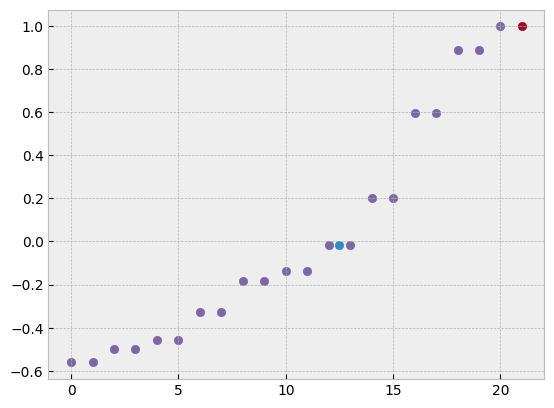

'\nPattern: every eignvalues except for one appears twice (degeneracy)\n'

In [6]:
# Now we control the eigenvalues using a linalg solver
eig_val_check, eig_vec_check = np.linalg.eigh(t_matrix)

print(eig_val_check)
def index_gen(li):
    return list(range(len(eig_val_check)))


plt.scatter(2*6+0.5,-eig_val_small)
plt.scatter(21,eig_val_big)
plt.scatter(index_gen(eig_val_check),eig_val_check)

plt.show()

"""
Pattern: every eignvalues except for one appears twice (degeneracy)
"""
